In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000472.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

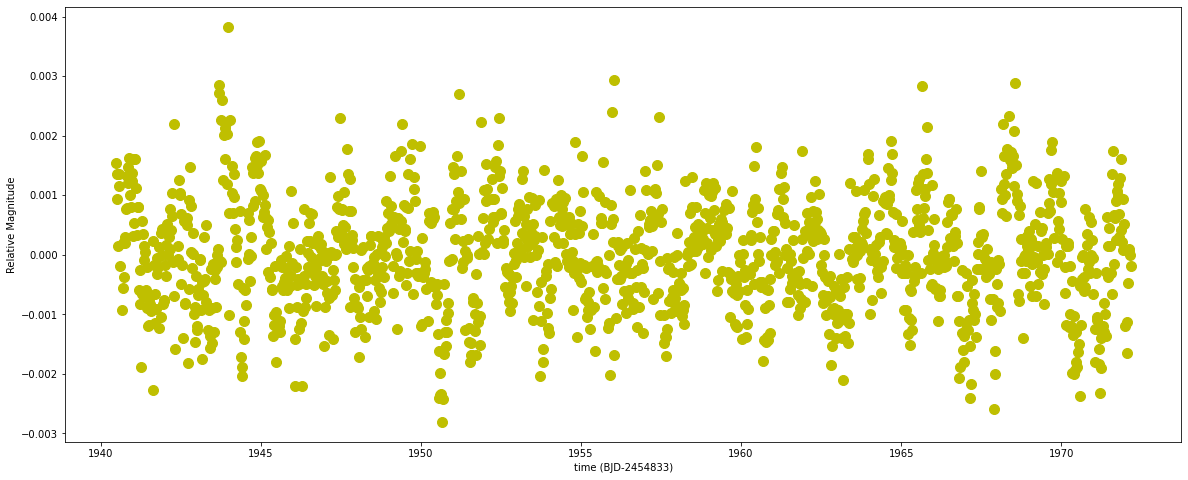

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000472')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200815 13:40:54 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200815 13:40:54 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200815 13:41:09 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200815 13:41:09 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200815 13:41:14 nonphysical:216] spline fit done. nknots = 13,  chisq = 13455287.37231, reduced chisq = 9915.46601
[I 200815 13:41:14 png:696] plotting phased LC with period 0.211546, epoch 1954.22804
[I 200815 13:41:14 nonphysical:216] spline fit done. nknots = 13,  chisq = 13533860.13205, reduced chisq = 9973.36782
[I 200815 13:41:14 png:696] plotting phased LC with period 0.105773, epoch 1954.22804
[I 200815 13:41:14 nonphysical:216] spline fit done. nknots = 13,  chisq = 13507003.54362, reduced chisq = 9953.57667
[I 200815 13:41:14 png:696] plotting phased LC with period 0.423092, epoch 1959.51984
[I 200815 13:41:14 nonphysical:216] spline fit done. nknots = 13,  chisq = 13500027.63784, reduced chisq = 9948.43599
[I 200815 13:41:14 png:696] plotting phased LC with period 0.114485, epoch 1954.33020
[I 200815 13:41:14 nonphysical:216] spline fit done. nknots = 13,  chisq = 13400399.04605, reduced chisq = 9882.30018
[I 200815 13:41:14 png:696] plotting phased LC with period 2.43765

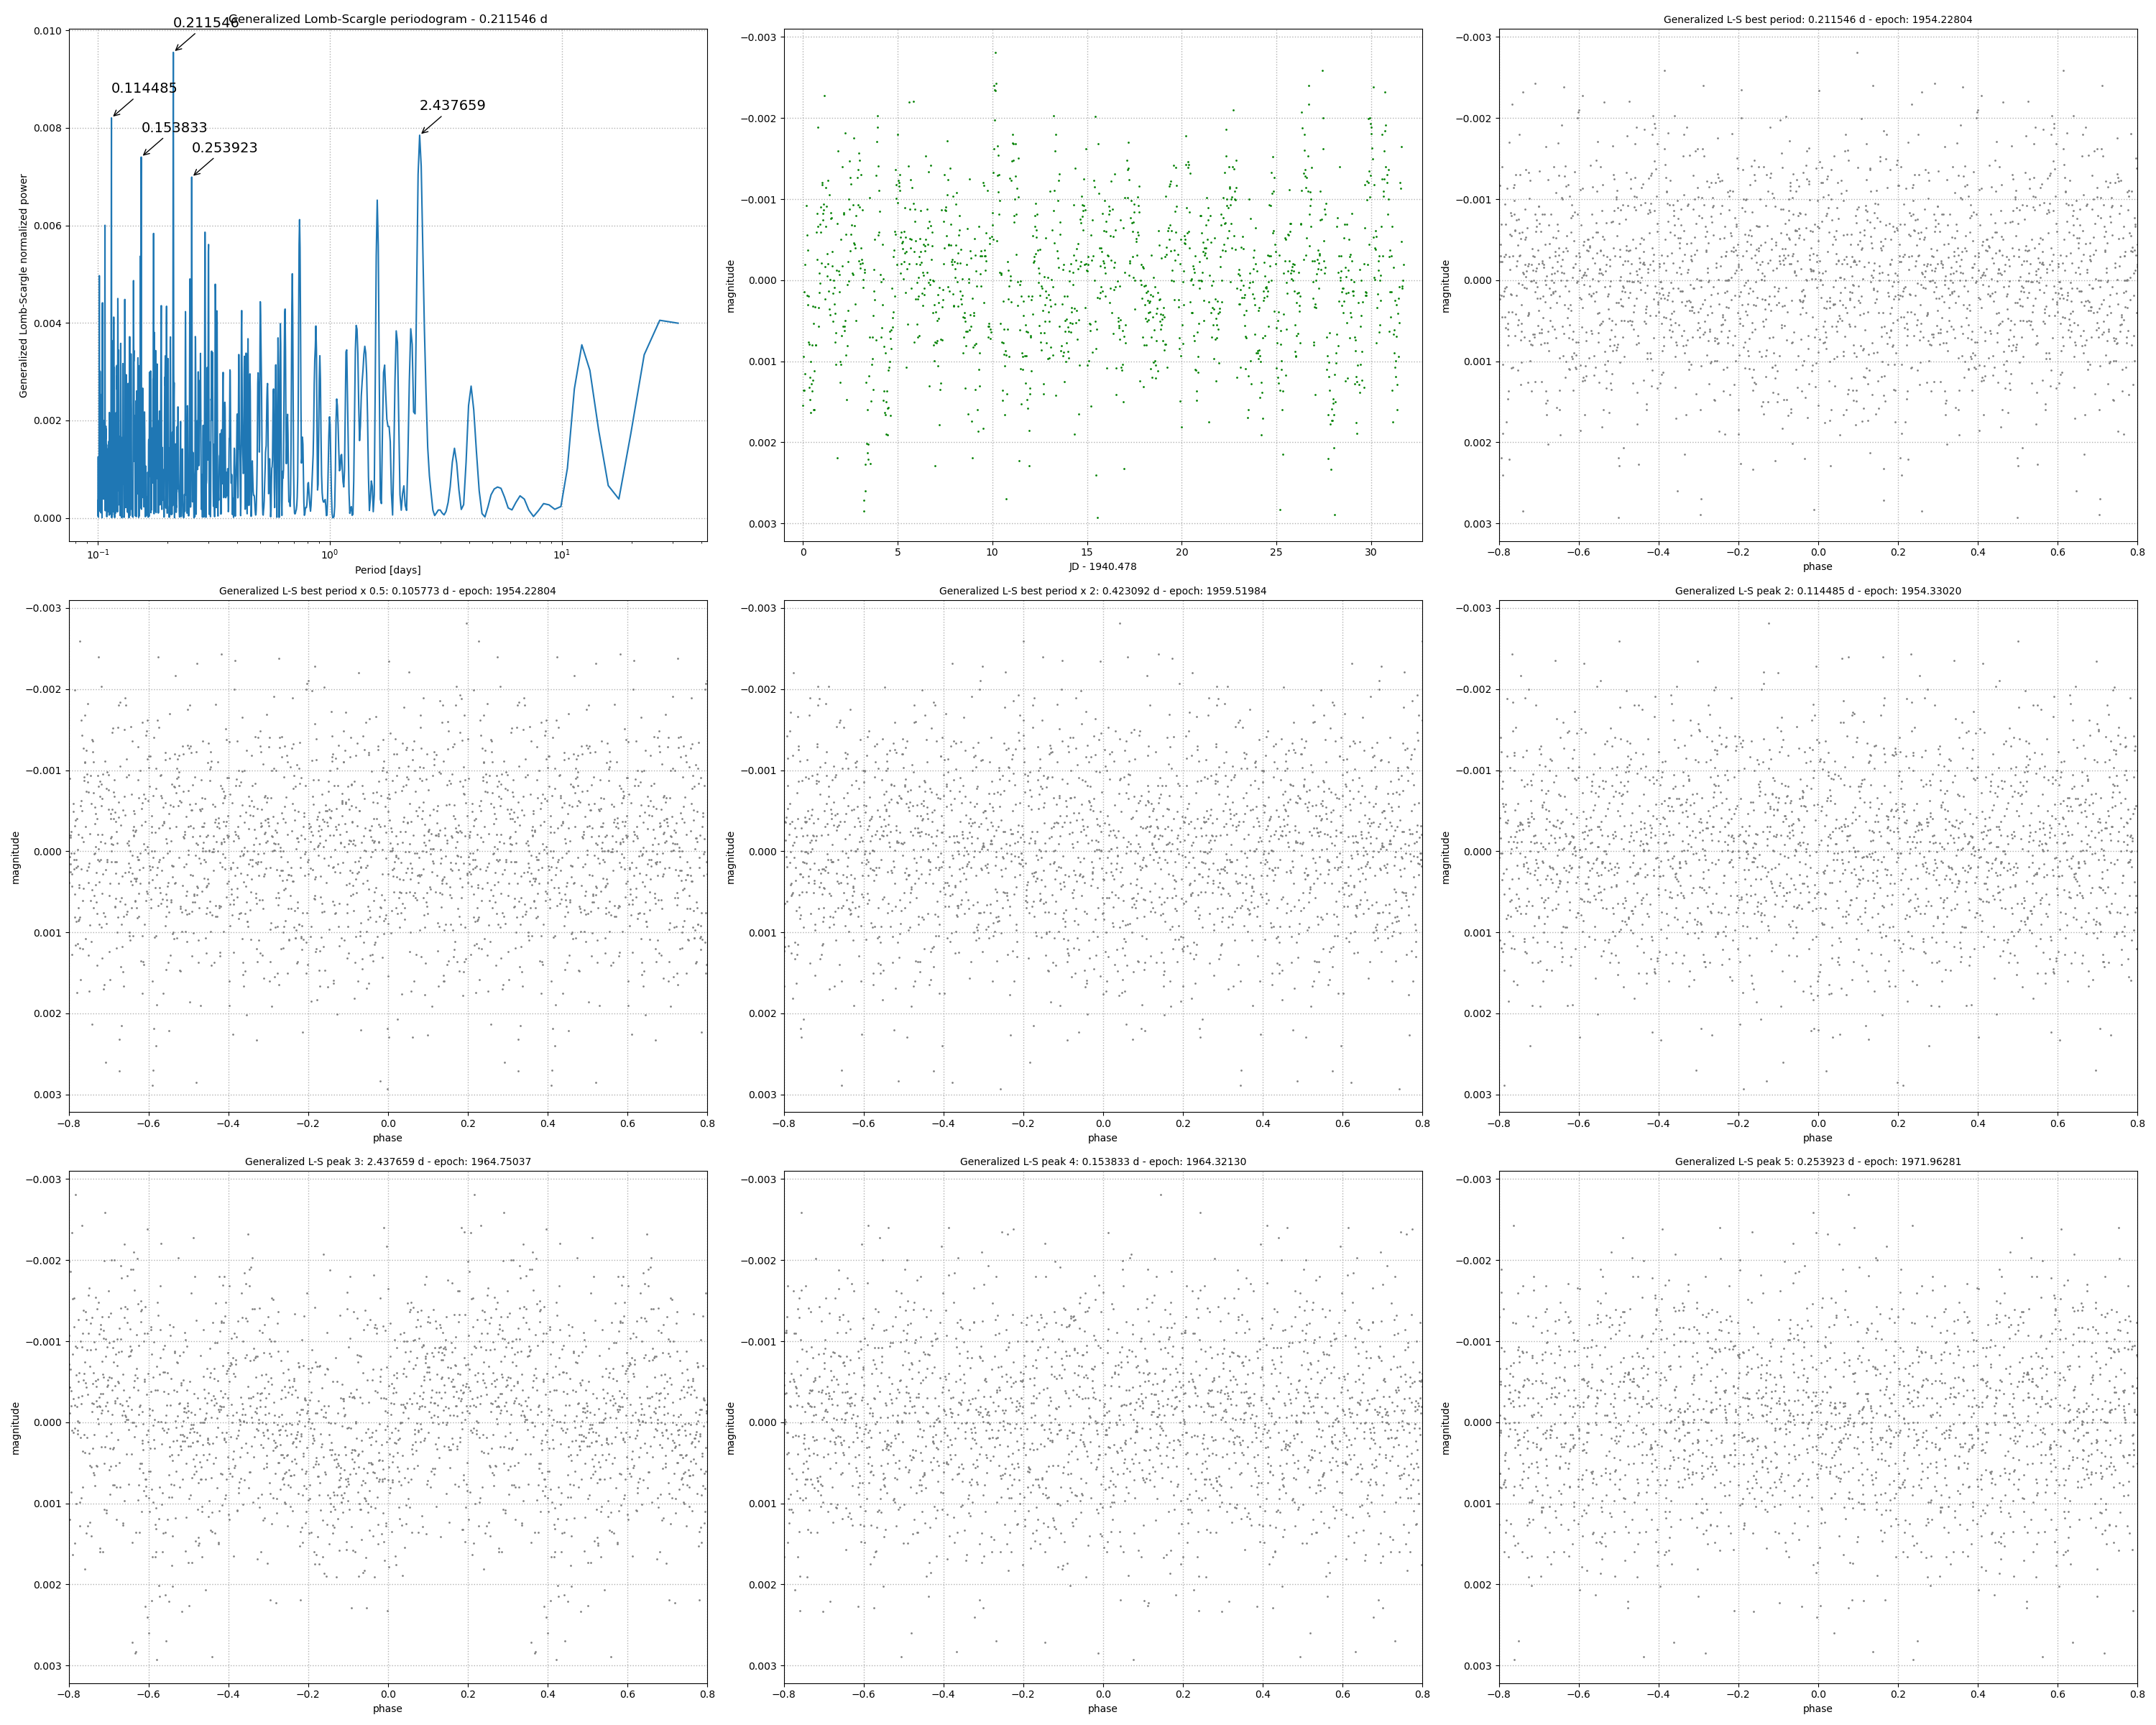

In [8]:
from IPython.display import Image
Image('0000472-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.21154583164218893,
 'bestlspval': 0.009547387254360233,
 'nbestpeaks': 5,
 'nbestlspvals': [0.009547387254360233,
  0.008203987796577801,
  0.007848598007963043,
  0.00740006776030217,
  0.006988962943759143],
 'nbestperiods': [0.21154583164218893,
  0.11448542478323664,
  2.4376588907692236,
  0.15383284262135877,
  0.2539228011217941],
 'lspvals': array([3.99349823e-03, 4.05304129e-03, 3.34654342e-03, ...,
        9.16650092e-05, 3.58736500e-04, 3.36429290e-04]),
 'omegas': array([ 0.198273  ,  0.2379276 ,  0.2775822 , ..., 62.73357791,
        62.77323251, 62.81288711]),
 'periods': array([31.68956558, 26.40797132, 22.63540399, ...,  0.10015665,
         0.10009338,  0.10003019]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.21154583164218893, 0.11448542478323664, 2.4376588907692236, 0.15383284262135877, 0.2539228011217941] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200815 13:42:10 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200815 13:42:10 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889032096980886e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200815 13:42:10 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200815 13:42:10 abls:969] new minfreq: 0.0631122567758471, maxfreq: 10.0
[I 200815 13:42:10 abls:980] using 6 workers...
[I 200815 13:42:10 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200815 13:42:10 abls:1090] worker 2: minfreq = 1.728092, nfreqs = 21105
[I 200815 13:42:10 abls:1090] worker 3: minfreq = 3.393073, nfreqs = 21105
[I 200815 13:42:10 abls:1090] worker 4: minfreq = 5.058053, nfreqs = 21105
[I 200815 13:42:10 abls:1090] worker 5: minfreq = 6.723033, nfreqs = 21105
[I 200815 13:42:10 abls:1090] worker 6: minfreq = 8.388013, nfreqs

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200815 13:42:33 png:1142] no best period found for this object, skipping...


In [13]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200815 13:42:38 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200815 13:42:38 spdm:349] using 6 workers...


In [14]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200815 13:42:43 nonphysical:216] spline fit done. nknots = 13,  chisq = 13524840.85174, reduced chisq = 9966.72134
[I 200815 13:42:43 png:696] plotting phased LC with period 7.202174, epoch 1940.47756
[I 200815 13:42:43 nonphysical:216] spline fit done. nknots = 13,  chisq = 13556276.24933, reduced chisq = 9989.88670
[I 200815 13:42:43 png:696] plotting phased LC with period 3.601087, epoch 1940.47756
[I 200815 13:42:43 nonphysical:216] spline fit done. nknots = 13,  chisq = 13538281.77611, reduced chisq = 9976.62622
[I 200815 13:42:43 png:696] plotting phased LC with period 14.404348, epoch 1940.47756
[I 200815 13:42:43 nonphysical:216] spline fit done. nknots = 13,  chisq = 13371983.39656, reduced chisq = 9854.07767
[I 200815 13:42:43 png:696] plotting phased LC with period 12.188294, epoch 1952.57307
[I 200815 13:42:43 nonphysical:216] spline fit done. nknots = 13,  chisq = 13571024.59702, reduced chisq = 10000.75505
[I 200815 13:42:43 png:696] plotting phased LC with period 6.09

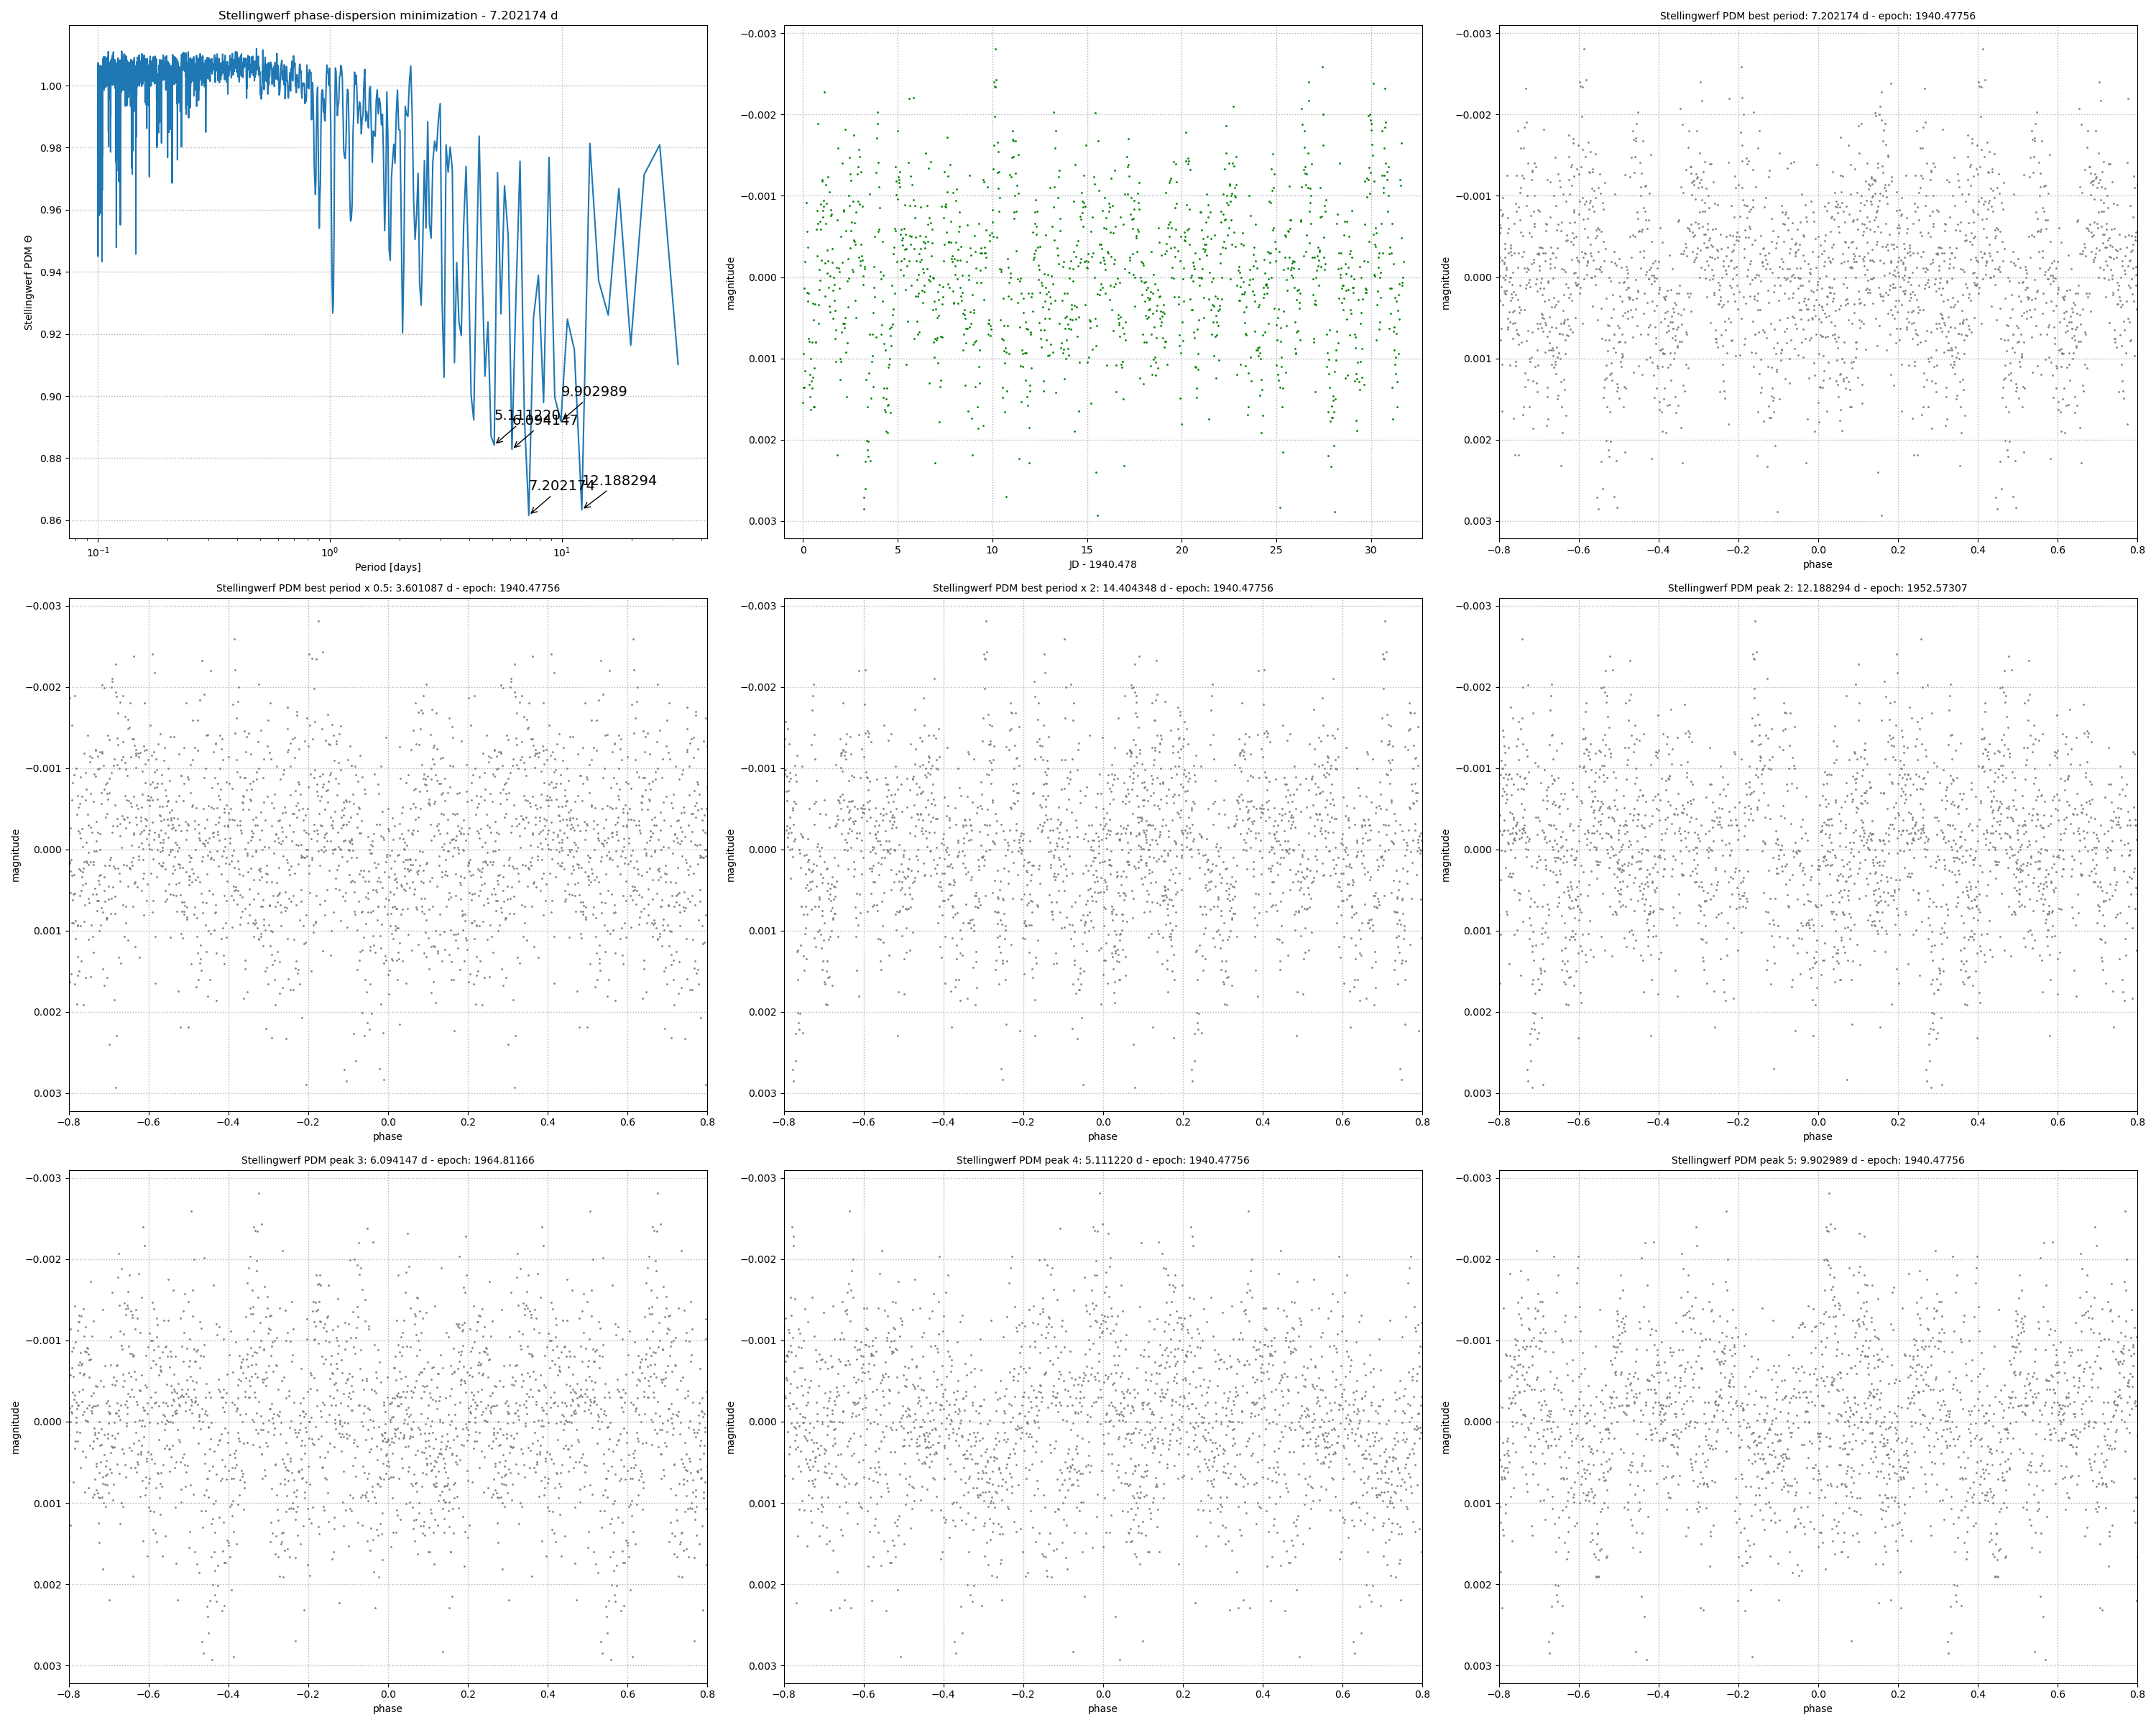

In [15]:
Image('0000472-checkplot-spdm.png')

In [16]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [7.202173995454523, 12.188294453846117, 6.0941472269230585, 5.1112202548386945, 9.90298924374997] (days)
